---
title: "MSDS 597 PROJECT: NBA Data Analysis"
author:
- name: Group 5
  affiliation: Rutgers University, New Brunswick
format:
  html:
    code-fold: true
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import legend



   Season         Player   PER    TS%
0    2019   Bradley Beal  20.8  0.581
1    2019   James Harden  30.6  0.616
2    2019   Kemba Walker  21.7  0.558
3    2019  Tobias Harris  17.2  0.592
4    2019  Tobias Harris  18.2  0.605


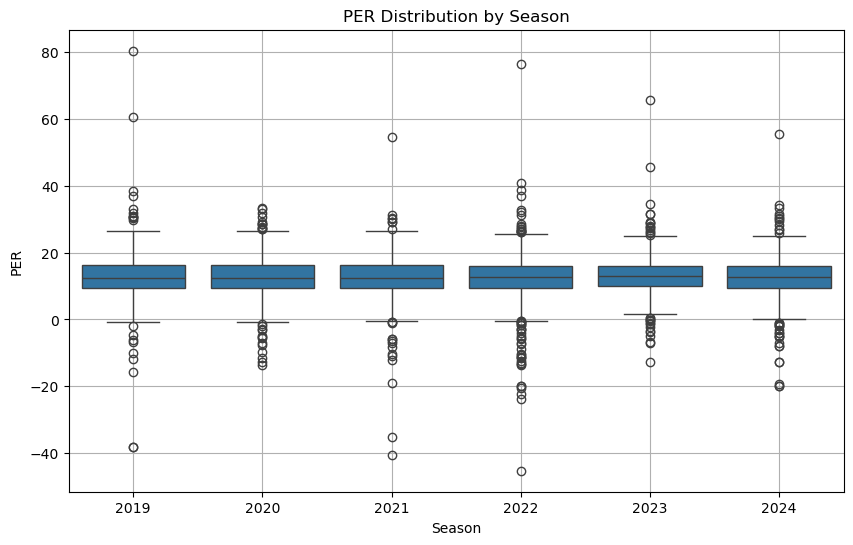

       pts   season
0     14.4  2019-20
1      9.5  2019-20
2      6.3  2019-20
3     11.9  2019-20
4      4.3  2019-20
...    ...      ...
1826   5.6  2022-23
1827  11.6  2022-23
1828  24.8  2022-23
1829   5.2  2022-23
1830   5.7  2022-23

[1831 rows x 2 columns]


In [2]:
# Load PER and TS% dataset and display the first few rows
df_per_ts = pd.read_csv("../data/PER-TS%.csv")
print(df_per_ts.head())

# Boxplot: Player Efficiency Rating (PER) by Season
plt.figure(figsize=(10, 6))
sns.boxplot(y=df_per_ts['PER'], x=df_per_ts['Season'])
plt.grid(True)
plt.title("PER Distribution by Season")
plt.show()

# Load seasonal player data from 2019 to 2022
df_19 = pd.read_csv("../data/merged_data_pos-2019.csv")
df_20 = pd.read_csv("../data/merged_data_pos-2020.csv")
df_21 = pd.read_csv("../data/merged_data_pos-2021.csv")
df_22 = pd.read_csv("../data/merged_data_pos-2022.csv")

# Add season labels
df_19['season'] = "2019-20"
df_20['season'] = "2020-21"
df_21['season'] = "2021-22"
df_22['season'] = "2022-23"

# Combine PTS and Season into a single dataframe for KDE plot
df_all_seasons = pd.concat([
    df_19[['pts', 'season']],
    df_20[['pts', 'season']],
    df_21[['pts', 'season']],
    df_22[['pts', 'season']]
], ignore_index=True)

print(df_all_seasons)



C:\Users\27508\AppData\Local\Temp\ipykernel_23776\2875802610.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Season')


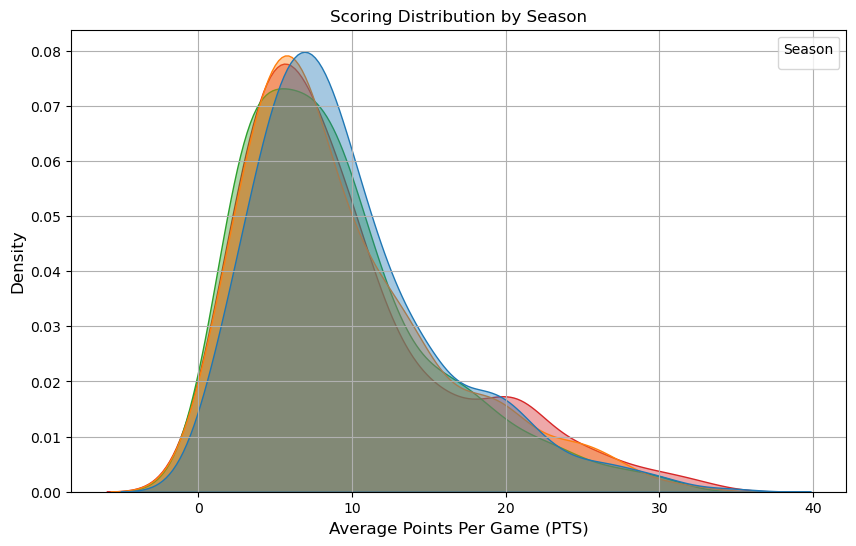

In [3]:
# KDE plot: Distribution of Points per Game across seasons
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_all_seasons, x='pts', hue='season', fill=True, common_norm=False, alpha=0.4)
plt.xlabel("Average Points Per Game (PTS)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title='Season')
plt.grid(True)
plt.title("Scoring Distribution by Season")
plt.show()



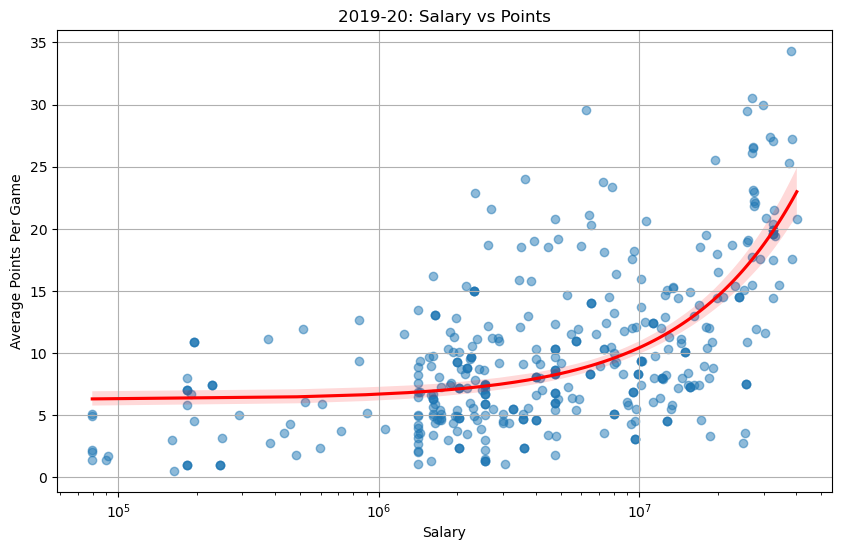

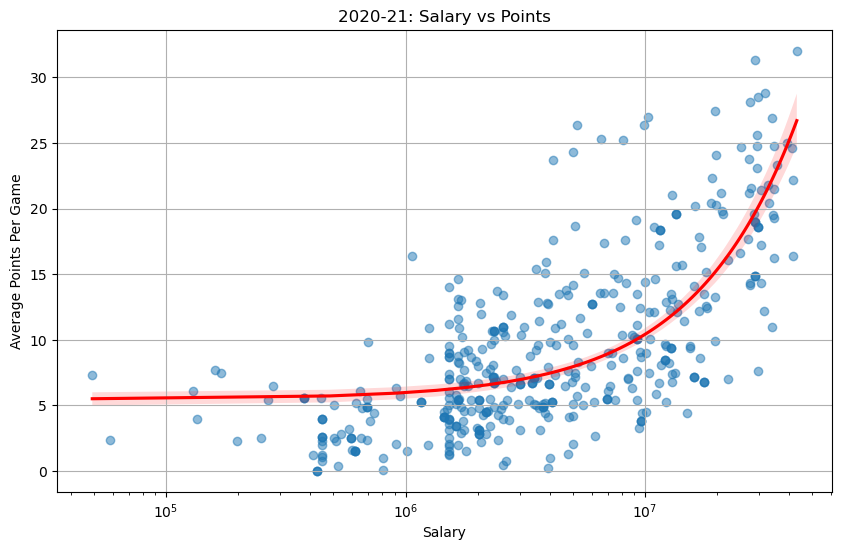

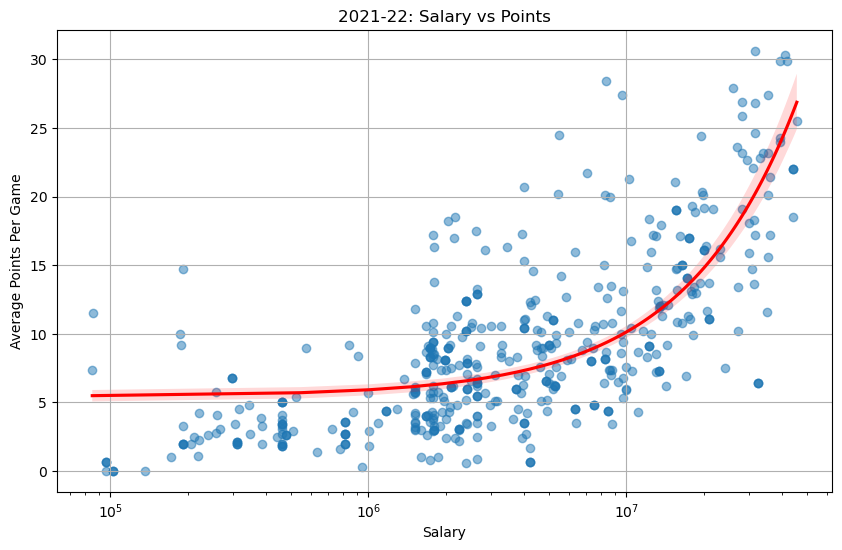

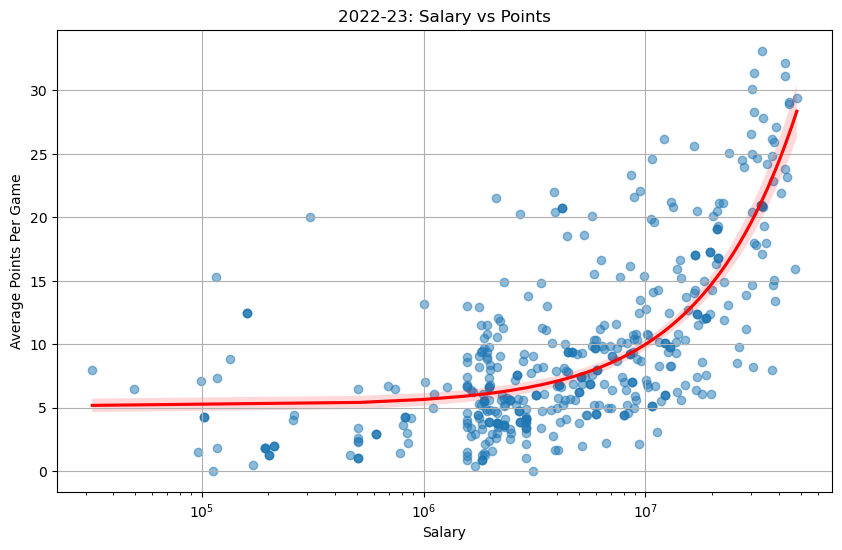

In [4]:
# Scatter + Regression plots for Salary vs Points (each season)

# 2019-20
plt.figure(figsize=(10, 6))
sns.regplot(data=df_19, x='season.y', y='pts', scatter_kws={'alpha': 0.5}, line_kws={"color": "red"})
plt.xscale("log")
plt.xlabel("Salary")
plt.ylabel("Average Points Per Game")
plt.title("2019-20: Salary vs Points")
plt.grid(True)
plt.show()

# 2020-21
plt.figure(figsize=(10, 6))
sns.regplot(data=df_20, x='2020/21', y='pts', scatter_kws={'alpha': 0.5}, line_kws={"color": "red"})
plt.xscale("log")
plt.xlabel("Salary")
plt.ylabel("Average Points Per Game")
plt.title("2020-21: Salary vs Points")
plt.grid(True)
plt.show()

# 2021-22
plt.figure(figsize=(10, 6))
sns.regplot(data=df_21, x='2021/22', y='pts', scatter_kws={'alpha': 0.5}, line_kws={"color": "red"})
plt.xscale("log")
plt.xlabel("Salary")
plt.ylabel("Average Points Per Game")
plt.title("2021-22: Salary vs Points")
plt.grid(True)
plt.show()

# 2022-23
plt.figure(figsize=(10, 6))
sns.regplot(data=df_22, x='2022/23', y='pts', scatter_kws={'alpha': 0.5}, line_kws={"color": "red"})
plt.xscale("log")
plt.xlabel("Salary")
plt.ylabel("Average Points Per Game")
plt.title("2022-23: Salary vs Points")
plt.grid(True)
plt.show()



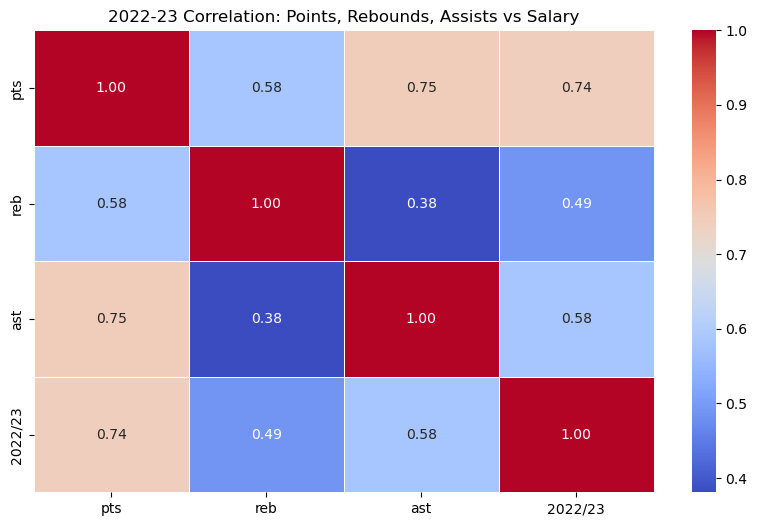

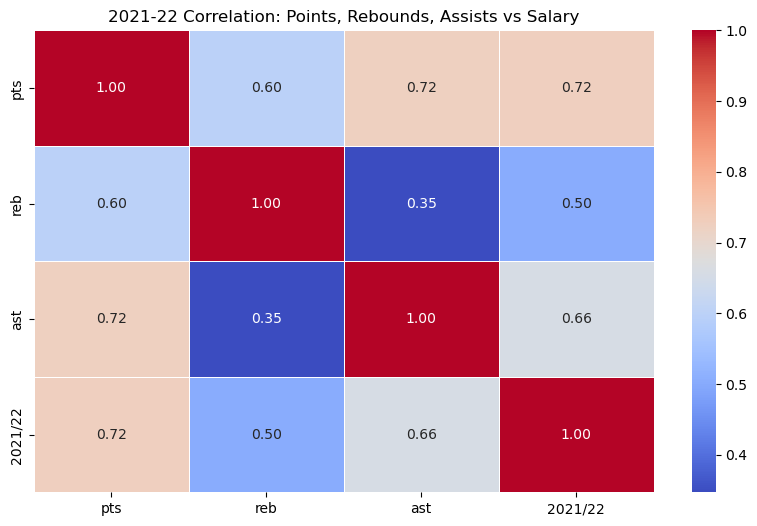

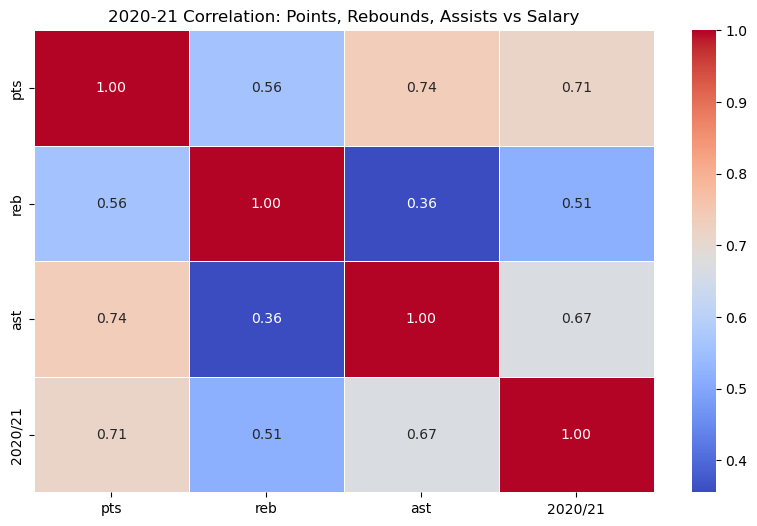

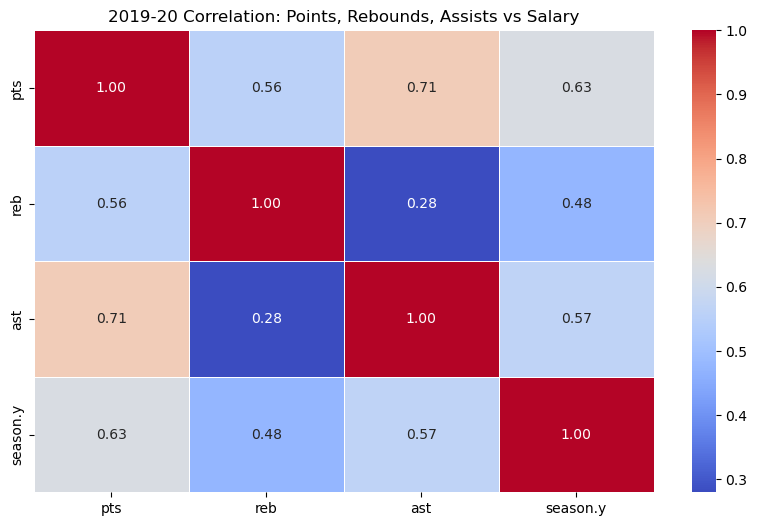

In [5]:
# Correlation heatmaps for each season

# 2022
plt.figure(figsize=(10, 6))
corr_matrix_22 = df_22[["pts", "reb", "ast", "2022/23"]].corr()
sns.heatmap(corr_matrix_22, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("2022-23 Correlation: Points, Rebounds, Assists vs Salary")
plt.show()

# 2021
plt.figure(figsize=(10, 6))
corr_matrix_21 = df_21[["pts", "reb", "ast", "2021/22"]].corr()
sns.heatmap(corr_matrix_21, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("2021-22 Correlation: Points, Rebounds, Assists vs Salary")
plt.show()

# 2020
plt.figure(figsize=(10, 6))
corr_matrix_20 = df_20[["pts", "reb", "ast", "2020/21"]].corr()
sns.heatmap(corr_matrix_20, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("2020-21 Correlation: Points, Rebounds, Assists vs Salary")
plt.show()

# 2019
plt.figure(figsize=(10, 6))
corr_matrix_19 = df_19[["pts", "reb", "ast", "season.y"]].corr()
sns.heatmap(corr_matrix_19, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("2019-20 Correlation: Points, Rebounds, Assists vs Salary")
plt.show()



C:\Users\27508\AppData\Local\Temp\ipykernel_23776\2990118663.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_19, x="Pos", y="pts", palette="Blues")
C:\Users\27508\AppData\Local\Temp\ipykernel_23776\2990118663.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_19, x="Pos", y="reb", palette="Greens")
C:\Users\27508\AppData\Local\Temp\ipykernel_23776\2990118663.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_19, x="Pos", y="ast", palette="Reds")


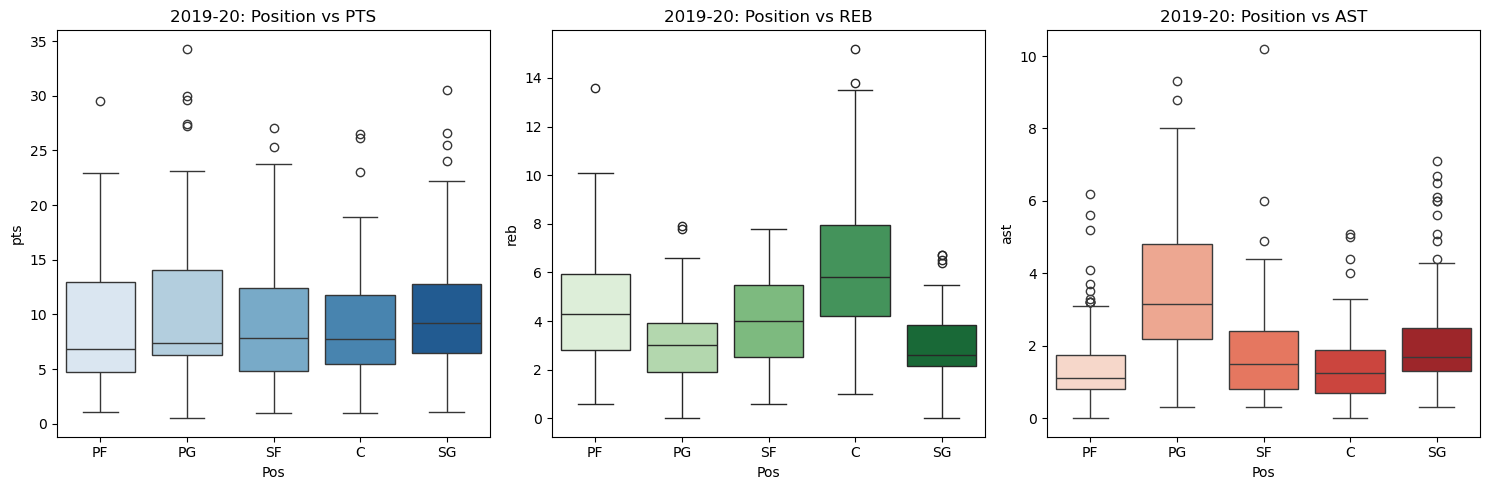

C:\Users\27508\AppData\Local\Temp\ipykernel_23776\2990118663.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_20, x="Pos", y="pts", palette="Blues")
C:\Users\27508\AppData\Local\Temp\ipykernel_23776\2990118663.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_20, x="Pos", y="reb", palette="Greens")
C:\Users\27508\AppData\Local\Temp\ipykernel_23776\2990118663.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_20, x="Pos", y="ast", palette="Reds")


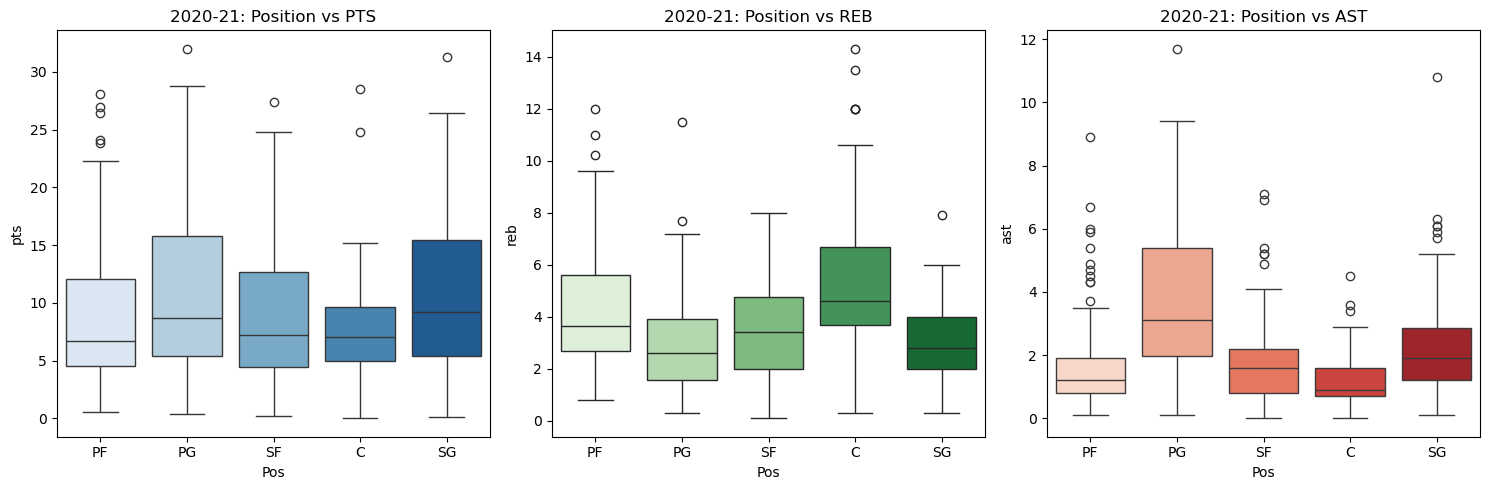

C:\Users\27508\AppData\Local\Temp\ipykernel_23776\2990118663.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_21, x="Pos", y="pts", palette="Blues")
C:\Users\27508\AppData\Local\Temp\ipykernel_23776\2990118663.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_21, x="Pos", y="reb", palette="Greens")
C:\Users\27508\AppData\Local\Temp\ipykernel_23776\2990118663.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_21, x="Pos", y="ast", palette="Reds")


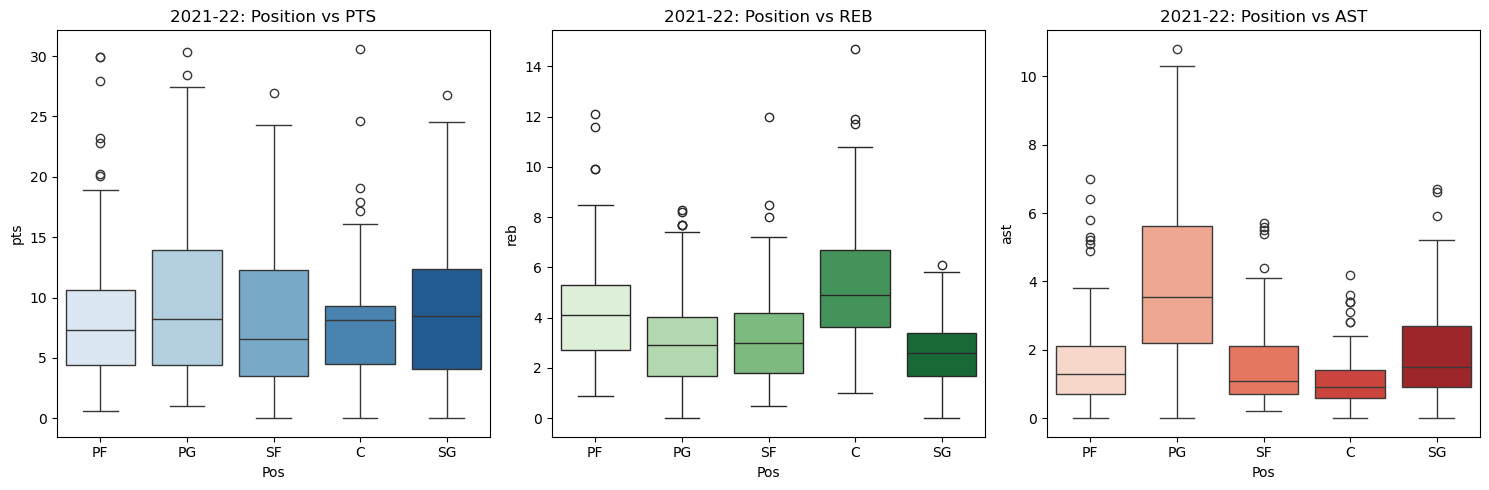

C:\Users\27508\AppData\Local\Temp\ipykernel_23776\2990118663.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_22, x="Pos", y="pts", palette="Blues")
C:\Users\27508\AppData\Local\Temp\ipykernel_23776\2990118663.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_22, x="Pos", y="reb", palette="Greens")
C:\Users\27508\AppData\Local\Temp\ipykernel_23776\2990118663.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_22, x="Pos", y="ast", palette="Reds")


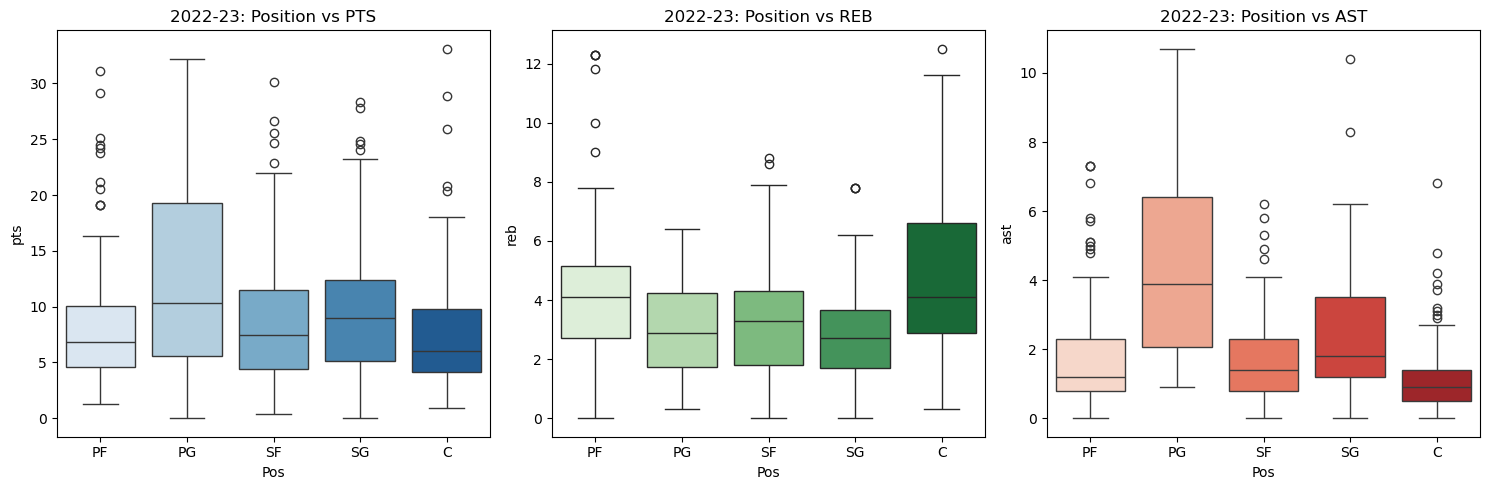

In [7]:
# Boxplots of performance metrics by player position for each season

# 2019
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(data=df_19, x="Pos", y="pts", palette="Blues")
plt.title("2019-20: Position vs PTS")
plt.subplot(1, 3, 2)
sns.boxplot(data=df_19, x="Pos", y="reb", palette="Greens")
plt.title("2019-20: Position vs REB")
plt.subplot(1, 3, 3)
sns.boxplot(data=df_19, x="Pos", y="ast", palette="Reds")
plt.title("2019-20: Position vs AST")
plt.tight_layout()
plt.show()

# 2020
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(data=df_20, x="Pos", y="pts", palette="Blues")
plt.title("2020-21: Position vs PTS")
plt.subplot(1, 3, 2)
sns.boxplot(data=df_20, x="Pos", y="reb", palette="Greens")
plt.title("2020-21: Position vs REB")
plt.subplot(1, 3, 3)
sns.boxplot(data=df_20, x="Pos", y="ast", palette="Reds")
plt.title("2020-21: Position vs AST")
plt.tight_layout()
plt.show()

# 2021
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(data=df_21, x="Pos", y="pts", palette="Blues")
plt.title("2021-22: Position vs PTS")
plt.subplot(1, 3, 2)
sns.boxplot(data=df_21, x="Pos", y="reb", palette="Greens")
plt.title("2021-22: Position vs REB")
plt.subplot(1, 3, 3)
sns.boxplot(data=df_21, x="Pos", y="ast", palette="Reds")
plt.title("2021-22: Position vs AST")
plt.tight_layout()
plt.show()

# 2022
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(data=df_22, x="Pos", y="pts", palette="Blues")
plt.title("2022-23: Position vs PTS")
plt.subplot(1, 3, 2)
sns.boxplot(data=df_22, x="Pos", y="reb", palette="Greens")
plt.title("2022-23: Position vs REB")
plt.subplot(1, 3, 3)
sns.boxplot(data=df_22, x="Pos", y="ast", palette="Reds")
plt.title("2022-23: Position vs AST")
plt.tight_layout()
plt.show()



C:\Users\27508\AppData\Local\Temp\ipykernel_23776\2563337894.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_19, x="Pos", y="season.y", palette="coolwarm")


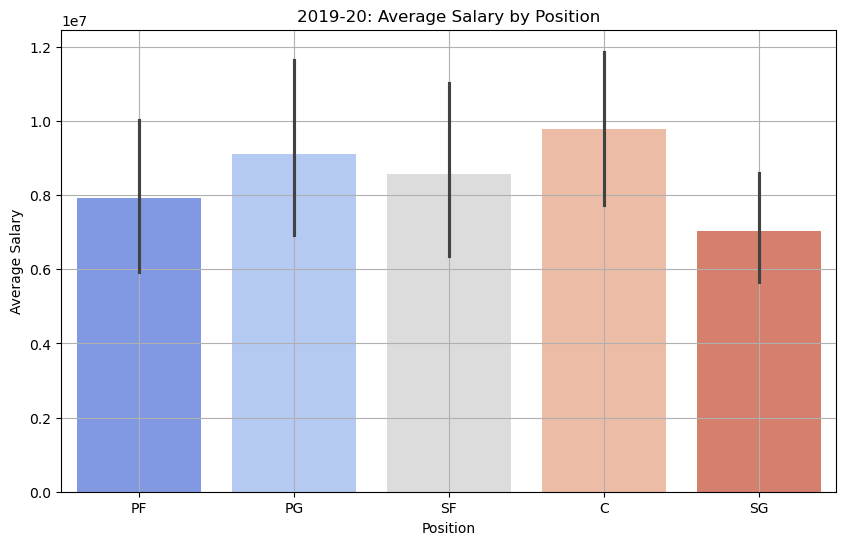

C:\Users\27508\AppData\Local\Temp\ipykernel_23776\2563337894.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_20, x="Pos", y="2020/21", palette="coolwarm")


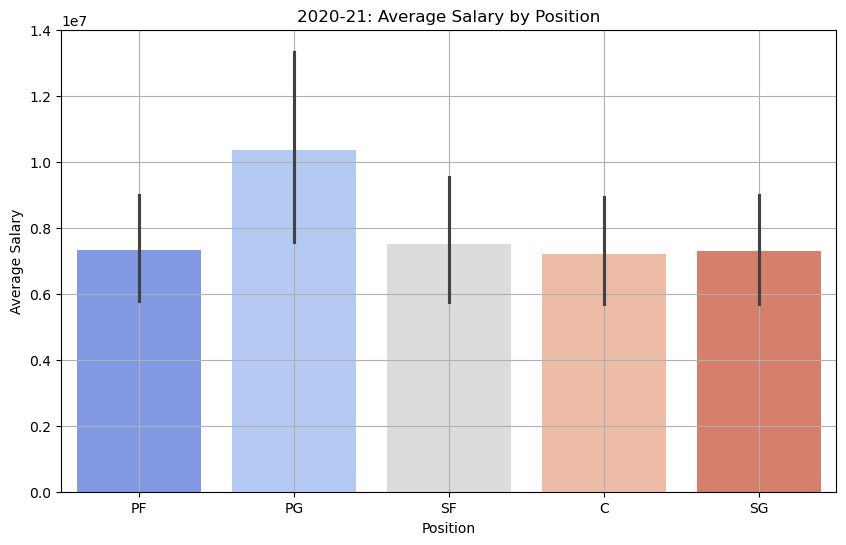

C:\Users\27508\AppData\Local\Temp\ipykernel_23776\2563337894.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_21, x="Pos", y="2021/22", palette="coolwarm")


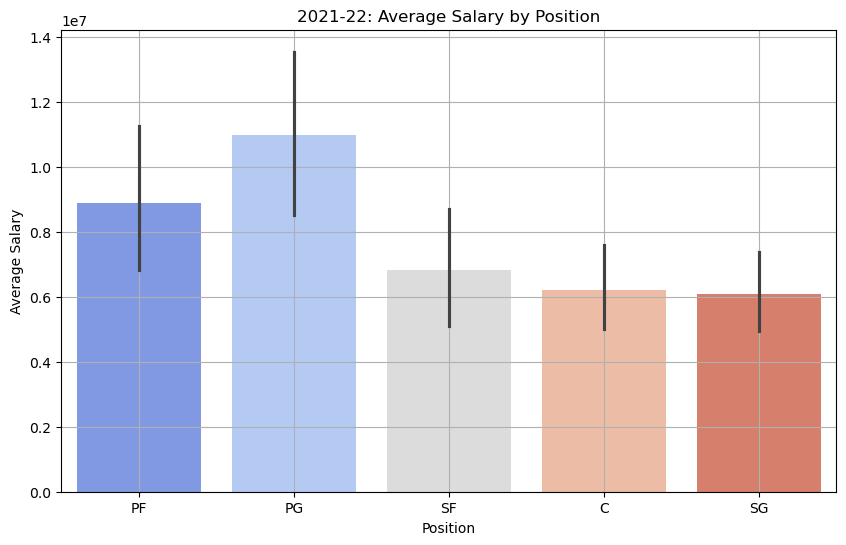

C:\Users\27508\AppData\Local\Temp\ipykernel_23776\2563337894.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_22, x="Pos", y="2022/23", palette="coolwarm")


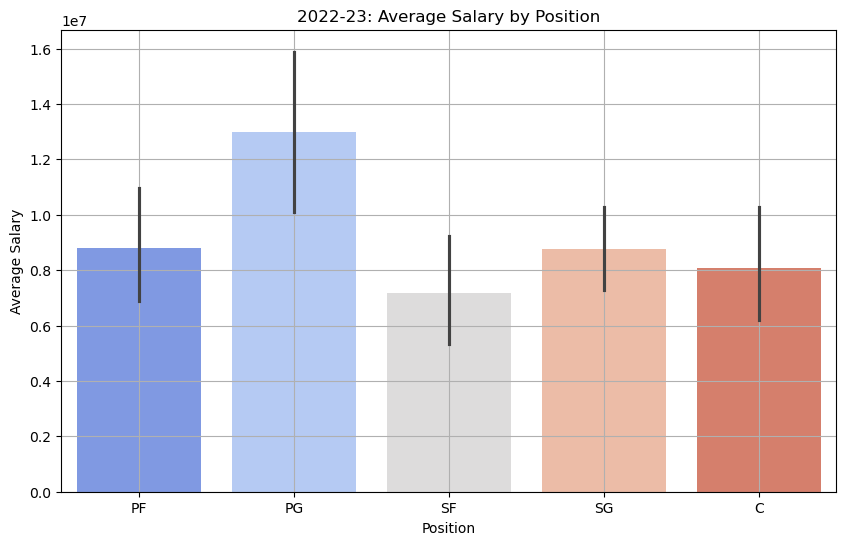

In [8]:
# Bar plots: Average Salary by Position

# 2019
plt.figure(figsize=(10, 6))
sns.barplot(data=df_19, x="Pos", y="season.y", palette="coolwarm")
plt.title("2019-20: Average Salary by Position")
plt.ylabel("Average Salary")
plt.xlabel("Position")
plt.grid(True)
plt.show()

# 2020
plt.figure(figsize=(10, 6))
sns.barplot(data=df_20, x="Pos", y="2020/21", palette="coolwarm")
plt.title("2020-21: Average Salary by Position")
plt.ylabel("Average Salary")
plt.xlabel("Position")
plt.grid(True)
plt.show()

# 2021
plt.figure(figsize=(10, 6))
sns.barplot(data=df_21, x="Pos", y="2021/22", palette="coolwarm")
plt.title("2021-22: Average Salary by Position")
plt.ylabel("Average Salary")
plt.xlabel("Position")
plt.grid(True)
plt.show()

# 2022
plt.figure(figsize=(10, 6))
sns.barplot(data=df_22, x="Pos", y="2022/23", palette="coolwarm")
plt.title("2022-23: Average Salary by Position")
plt.ylabel("Average Salary")
plt.xlabel("Position")
plt.grid(True)
plt.show()
